In [2]:
from sklearn import datasets 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np
from scipy import stats
from tqdm import tqdm

data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X,Y = data['data'][0:100],data['target'][0:100]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer,StandardScaler
model  = LogisticRegression()

model.fit(X,Y)

print('accuract :',accuracy_score(model.predict(X),Y))


accuract : 1.0


In [41]:
LogisticRegression?

In [160]:
class LogisticRegression():

    def __init__(self, max_iter = 100,learning_rate=.1,alpha = 10):
        
        self.alpha = 1 / alpha
        self.W = None
        self.B = None
        self.lr = learning_rate
        self.max_iter = max_iter 
        self.losses = []    
        
    def init_params(self, X):
        
        n_features = np.shape(X)[1]
        limit = 1 / math.sqrt(n_features)
        self.W = np.random.uniform(-limit, limit, (n_features,))
        self.B = 1
    
    
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))   
    
    
    
    
#     def sigmoid_grad(self,x):
#         return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def l2_reg(self,x):
        
        return self.alpha * 0.5 * x.T.dot(x)
    
    def l2_reg_grad(self,x):
        
        return self.alpha * x
    
    def fit(self, X,y):
        
        self.init_params(X)
         
        for i in range(self.max_iter):

            
            y_pred = self.sigmoid(X.dot(self.W))
            
            #binary cross entropy
            loss = np.mean(-(y * np.log2(y_pred) + (1 - y) * np.log2(1 - y_pred))) #+ self.l2_reg(self.W)
            
#             print(f'epochs {i} / {self.max_iter} loss : {loss}')
            self.losses.append(loss)
            
            grad = -(y - y_pred)
            
            self.W -= self.lr * (grad.dot(X) / X.shape[0]) #  + self.l2_reg_grad(self.W))
#             self.B -= self.lr * (sum(grad) / X.shape[0])
            
             
    def predict(self, X):
        
        h = X.dot(self.W) #+ self.B
        a = self.sigmoid(h)
#         y_pred = np.round(a).astype(int)
    

        return a
    
    def plot(self):
        import matplotlib.pyplot as plt 
        
        plt.plot(self.losses)
        plt.title('loss vs epochs')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()
        
        
# X_ = Normalizer().fit_transform(X)    
# X_ =   StandardScaler().fit_transform(X_)  
model =  LogisticRegression(alpha = 10,max_iter=1000)
model.fit(X,Y)    
print('accuracy :',accuracy_score(model.predict(X),Y))    

accuracy : 0.3333333333333333


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log2
c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


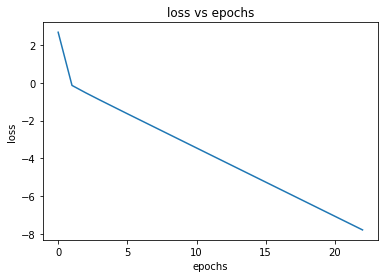

In [161]:
model.plot()

# Multi-Class Sigmoid : OVR Classifier 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer,StandardScaler


X,Y = data['data'],data['target']
model  = LogisticRegression(multi_class = 'ovr')

model.fit(X,Y)

print('accuract :',accuracy_score(model.predict(X),Y))


accuract : 0.9533333333333334


In [166]:
class OneVsRestClassifier:
    
    
    def __init__(self):
        self.n_classes = None
        self.estimators = []
    
    def get_new_labels(self,Y,label):
        
        new_Y = np.zeros(len(Y))
        
        new_Y[Y == label] = 1
        new_Y[Y != label] = 0
        
        return new_Y
        

        
    def fit(self,X,Y):
        
        #store all estimators in a list 
        
        
        # using the ovr method  we need to create one classifier per class 
        
        self.n_classes = np.unique(Y)
        
        
        # the current label is class label the other classes will be labeled -1 
        
        for label in  self.n_classes:
            
            Y_ = self.get_new_labels(Y,label)
            
#             print(label,Y_)
            
            model = LogisticRegression(max_iter=1000)
            model.fit(X,Y_)
            
            self.estimators.append(model)
        
        
    def predict(self,X):
        
        classes = []
        for sample in X:
            
            preds = []

            for idx,label in enumerate(self.n_classes):

                val = self.estimators[idx].predict(sample.reshape(1,-1))

                if val > 0.3:
                    preds.append(1)
                else:
                    preds.append(0)
                  
#                 preds.append(val) 
                
            classes.append(np.argmax(preds))
        
        return classes
    
    
model = OneVsRestClassifier()
model.fit(X,Y)

In [167]:
preds = model.predict(X)

In [169]:
accuracy_score(preds,Y)

0.74

[0]